In [1]:
import argparse
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import pickle
from skimage.transform import resize
import sys
import torch
import torchvision
from torchvision.transforms import transforms as transforms
%matplotlib inline

In [2]:
# pd.DataFrame(all_outputs).to_pickle('all_figures.pkl')
with open('all_figures.pkl', 'rb') as fid:
    data = pickle.load(fid)

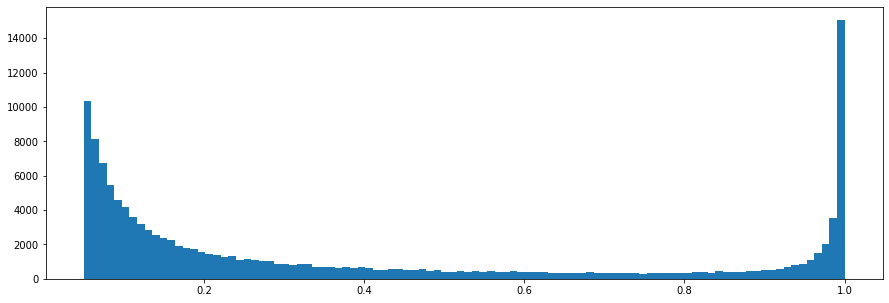

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
# ax.hist(np.log10(data.score.values), 100)
ax.hist(data.score.values, 100)
plt.show()

In [12]:
data.head()

,fname,fig_index,score,key_scores,points,box
0,../data/raw/dragonborn_barbarian_female_000000...,0,0.922225,"[12.803500175476074, 12.484930992126465, 12.19...","[[459.20751953125, 270.37811279296875, 1.0], [...","[267.4775390625, 222.54371643066406, 714.65081..."
1,../data/raw/dragonborn_barbarian_female_000000...,1,0.406446,"[-1.7409194707870483, -2.353048086166382, 1.37...","[[589.8466186523438, 881.515380859375, 1.0], [...","[433.4228820800781, 715.6868286132812, 721.478..."
2,../data/raw/dragonborn_barbarian_female_000000...,2,0.377887,"[-0.6488617658615112, 0.3389887511730194, -0.3...","[[615.6602172851562, 839.5869750976562, 1.0], ...","[615.0689697265625, 834.2911987304688, 707.312..."
3,../data/raw/dragonborn_barbarian_female_000000...,3,0.208445,"[-1.54018235206604, -2.2524521350860596, -2.36...","[[457.7750244140625, 496.6410217285156, 1.0], ...","[331.8320617675781, 494.8707275390625, 719.712..."
4,../data/raw/dragonborn_barbarian_female_000000...,4,0.166462,"[0.2740557789802551, 2.7508866786956787, 0.436...","[[379.1613464355469, 793.6376953125, 1.0], [33...","[277.50244140625, 736.3004760742188, 418.53213..."


In [11]:
(data.score.values > 0.99).sum()

15329

In [2]:
# initialize the model
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(
    pretrained=True, num_keypoints=17
)
# set the computation device
device = torch.device(0)

# load the model on to the computation device and set to eval mode
model.to(device).eval()

# transform to convert the image to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
image_files = sorted(glob.glob('../data/raw/*.jpg'))

out_dir = '../data/figures/'
try:
    os.mkdir(out_dir)
except:
    pass


all_outputs = []

for i, fname in enumerate(image_files):
    sys.stdout.write('\r\t%d\t' % i)
    
    try:
        image = Image.open(fname).convert('RGB')

        # NumPy copy of the image for OpenCV functions
        img = np.array(image, dtype=np.float32) / 255

        # transform the image
        image = transform(image)

        # add a batch dimension
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image)

        H, W, _ = img.shape

        boxes = output[0]['boxes'].cpu()
        scores = output[0]['scores'].detach().cpu().numpy()

        for j, b in enumerate(boxes):
            '''if scores[j] < 0.9:
                continue

            x0, y0, x1, y1 = b
            w = x1 - x0
            h = y1 - y0

            i0 = max(int(x0 - w/4), 0)
            i1 = min(int(x1 + w/4), W)

            j0 = max(int(y0 - h/4), 0)
            j1 = min(int(y1 + h/4), H)

            im = img[j0:j1, i0:i1]

            outfile = out_dir + fname.split('/')[-1].rstrip('.jpg') + '_%04d' % j + '.pkl'

            # resize to square
            # img = resize(img, (128, 128))

            with open(outfile, 'wb') as fout:
                # pickle.dump(im, fout)
                pass'''

            all_outputs.append({
                'fname': fname,
                'fig_index': j,
                'score': scores[j],
                'key_scores': output[0]['keypoints_scores'][j].tolist(),
                'points': output[0]['keypoints'][j].tolist(),
                'box': output[0]['boxes'][j].tolist()
            })
            pd.DataFrame(all_outputs).to_pickle('all_figures.pkl')
    except Exception as e:
        print(e)
        continue

	0	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


	9	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	68	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	112	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	190	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	581	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	870	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	909	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	1062	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	1162	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	1292	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	1375	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	1635	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	1711	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	2174	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	2429	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	2815	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	2994	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	3691	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	3761	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	3901	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	6563	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	7191	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	7769	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	7886	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	8199	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	8593	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	8880	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	9287	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	9426	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	9604	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	10189	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	10285	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	10481	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	10574	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	11435	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	12419	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	12457	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	12504	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	12736	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	12752	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13113	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13116	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13130	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13171	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13177	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13214	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13284	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13382	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13528	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	13981	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	14030	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	14109	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	14683	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	14742	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	14773	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	15432	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	15505	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	15630	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	16467	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	16481	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	16485	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	17232	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	17906	

/home/alan/miniconda3/envs/mytorch/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


	18066	cannot identify image file '../data/raw/human_bard_female_000000049.jpg'
	18512	

In [ ]:
pd.DataFrame(all_outputs).to_pickle('all_figures.pkl')